## Configuraciones e installs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 25.3 MB/s eta 0:00:00


In [ ]:
#!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.2 MB/s eta 0:00:00


In [3]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.5 MB/s eta 0:00:00


In [4]:
!pip install datasets

## Exploracion de los datos

In [5]:
import pandas as pd
from datasets import Dataset
import numpy as np
import matplotlib.pyplot as plt

### Zero shot

In [6]:
train_zero_shot_a = pd.read_csv("/content/drive/MyDrive/proyecto-final-ecd/datasets/subtask-a/train_zero_shot.csv")

In [ ]:
train_zero_shot_a.head()

,DataID,Language,MWE,Setting,Previous,Target,Next,Label
0,train_zero_shot.EN.168.1,EN,double dutch,zero_shot,This inspired others to jump ropes as a leisur...,There are several theories behind the origin o...,The most popular theory states that “Double Du...,0
1,train_zero_shot.EN.168.2,EN,double dutch,zero_shot,In the age of chivalry a man paid for the woma...,"Double Dutch also derives from the same era, D...",There are many phrases that include the word: ...,0
2,train_zero_shot.EN.168.3,EN,double dutch,zero_shot,"To her eternal credit, she kept both India and...",Since 1977 we have had a plethora of Foreign M...,We need to exclude from that list the late Mr ...,0
3,train_zero_shot.EN.168.4,EN,double dutch,zero_shot,While pharmaceutical companies were researchin...,Turns out that these people were speaking doub...,So why aren’t Big Macs sold all over the world...,0
4,train_zero_shot.EN.168.5,EN,double dutch,zero_shot,Coronavirus in Europe * Brexit * Brussels ...,Is Flemish premier talking double Dutch?,Three months before the Belgians take over the...,0


In [ ]:
train_zero_shot_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DataID    4491 non-null   object
 1   Language  4491 non-null   object
 2   MWE       4491 non-null   object
 3   Setting   4491 non-null   object
 4   Previous  4491 non-null   object
 5   Target    4491 non-null   object
 6   Next      4489 non-null   object
 7   Label     4491 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 280.8+ KB


In [7]:
# Casteo tipos object
train_zero_shot_a = train_zero_shot_a.astype({"Previous": "string", "Target": "string", "Next": "string", "Label": "int64"})

# Reemplazo nulos de columna Next
train_zero_shot_a = train_zero_shot_a.fillna(value={"Next": ''})

In [ ]:
train_zero_shot_a["Language"].value_counts()

EN    3327
PT    1164
Name: Language, dtype: int64

In [8]:
train_zero_shot_a = train_zero_shot_a[train_zero_shot_a["Language"] == "EN"]

In [10]:
train_zero_shot_a["Label"].value_counts(normalize=True)

pandas.core.series.Series

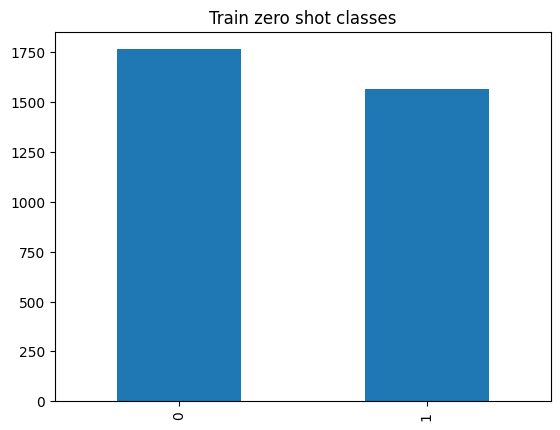

In [12]:
train_zero_shot_a["Label"].value_counts().plot.bar()
plt.title("Train zero shot classes")
plt.show()

In [ ]:
train_zero_shot_a.shape

In [ ]:
train_zero_shot_a.plot.hist(column=["Label"])

### Dev data

In [14]:
dev = pd.read_csv("/content/drive/MyDrive/proyecto-final-ecd/datasets/subtask-a/dev.csv")
dev_l = pd.read_csv("/content/drive/MyDrive/proyecto-final-ecd/datasets/subtask-a/dev_gold.csv")

In [ ]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        739 non-null    int64 
 1   Language  739 non-null    object
 2   MWE       739 non-null    object
 3   Previous  739 non-null    object
 4   Target    739 non-null    object
 5   Next      739 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.8+ KB


In [ ]:
dev_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        739 non-null    int64 
 1   DataID    739 non-null    object
 2   Language  739 non-null    object
 3   Label     739 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 23.2+ KB


In [ ]:
dev_l.head()

,ID,DataID,Language,Label
0,3652,dev.EN.147.1,EN,1
1,11103,dev.EN.147.2,EN,1
2,84346,dev.EN.147.3,EN,1
3,56279,dev.EN.147.4,EN,1
4,17886,dev.EN.147.5,EN,1


In [ ]:
dev.head()

,ID,Language,MWE,Previous,Target,Next
0,3652,EN,high life,"Does the plumbing predictably rebel, creating ...",Are these interruptions of the good life a nec...,"Not at all , says James von Klemperer, preside..."
1,11103,EN,high life,Let’s be honest – we would be chuffed if our b...,But for Australian fashion designer Abby Kheir...,"Speaking to the Daily Mail , the owner of Abys..."
2,84346,EN,high life,I already have the winning ticket.,"With that, I will be enjoying the pleasures of...","Charles Selle is a former News-Sun reporter, p..."
3,56279,EN,high life,"There were signs everywhere of cosy, comfortab...","Fendi offered swaddling, belted coats resembli...",Shawl collars and enveloping dressing-gown sty...
4,17886,EN,high life,Yet one thing is clear.,"Rick Ross and Diddy exemplify the high life, t...",And who knows -- maybe we'll see Puff on his a...


In [15]:
# Casteo tipos object
dev = dev.astype({"Previous": "string", "Target": "string", "Next": "string"})

# Filtro solo los datos en Ingles
dev = dev[dev["Language"] == "EN"]

# Merge con etiquetas
dev = dev.merge(dev_l[["ID", "DataID", "Label"]], how="inner", on="ID")
dev.head()

,ID,Language,MWE,Previous,Target,Next,DataID,Label
0,3652,EN,high life,"Does the plumbing predictably rebel, creating ...",Are these interruptions of the good life a nec...,"Not at all , says James von Klemperer, preside...",dev.EN.147.1,1
1,11103,EN,high life,Let’s be honest – we would be chuffed if our b...,But for Australian fashion designer Abby Kheir...,"Speaking to the Daily Mail , the owner of Abys...",dev.EN.147.2,1
2,84346,EN,high life,I already have the winning ticket.,"With that, I will be enjoying the pleasures of...","Charles Selle is a former News-Sun reporter, p...",dev.EN.147.3,1
3,56279,EN,high life,"There were signs everywhere of cosy, comfortab...","Fendi offered swaddling, belted coats resembli...",Shawl collars and enveloping dressing-gown sty...,dev.EN.147.4,1
4,17886,EN,high life,Yet one thing is clear.,"Rick Ross and Diddy exemplify the high life, t...",And who knows -- maybe we'll see Puff on his a...,dev.EN.147.5,1


In [9]:
dev.shape

(466, 8)

In [ ]:
dev["Label"].value_counts(normalize=True)

1    0.609442
0    0.390558
Name: Label, dtype: float64

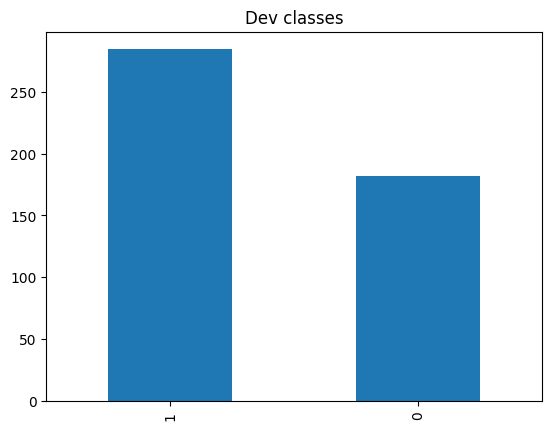

In [16]:
dev["Label"].value_counts().plot.bar()
plt.title("Dev classes")
plt.show()

### Eval data

In [10]:
eval = pd.read_csv("/content/drive/MyDrive/proyecto-final-ecd/datasets/subtask-a/eval.csv")

In [ ]:
eval.head()

,ID,Language,MWE,Previous,Target,Next
0,83910,EN,mailing list,Every registered voter 65 and older who was no...,The Secretary of State’s office became aware o...,"I’m no mathematician, but I said, ‘We have a p..."
1,14692,EN,mailing list,"To the best of the AAFP's knowledge, the spons...",Organizations and individuals may rent the AAF...,The AAFP's Marketing Research Department must ...
2,3378,EN,mailing list,"Once the program is running, the payments coul...",TDHCA will be providing updates on how to appl...,The program comes after renters have spent mon...
3,97296,EN,mailing list,"Red Hat, Cisco, and Google were involved in th...",All major Linux distributions also received th...,We assume that smaller and other downstream ve...
4,36148,EN,mailing list,This optional step could save considerable mon...,"Larger and active mailing lists (e.g., more th...",These database management tools allow for batc...


In [11]:
eval.shape

(762, 6)

In [12]:
eval[eval["Language"] == "EN"].shape

(483, 6)

## Modelo Baseline

### Clasificador Bayesiano

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Uno las oraciones en una sola columna
train_data = train_zero_shot_a[["Previous", "Target", "Next"]].apply(' '.join, axis=1)
dev_data = dev[["Previous", "Target", "Next"]].apply(' '.join, axis=1)

In [ ]:
train_labels = train_zero_shot_a["Label"]
dev_labels = dev["Label"]

In [ ]:
modelCVNB = make_pipeline(CountVectorizer(), MultinomialNB())
modelCVNB.fit(train_data, train_labels)
labelsCVNB = modelCVNB.predict(dev_data)

Text(77.92222222222227, 0.5, 'predicted label')

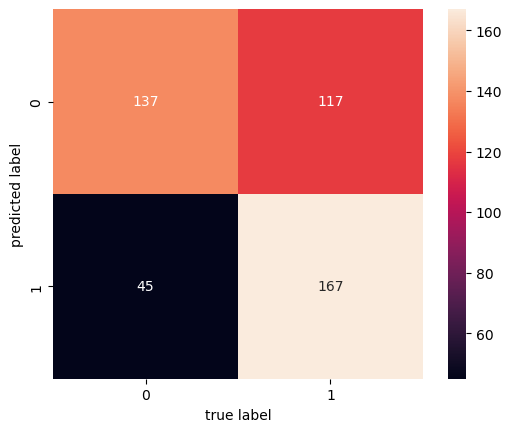

In [ ]:
mat = confusion_matrix(dev_labels, labelsCVNB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
print(classification_report(dev_labels, labelsCVNB))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63       182
           1       0.79      0.59      0.67       284

    accuracy                           0.65       466
   macro avg       0.66      0.67      0.65       466
weighted avg       0.69      0.65      0.66       466



F1 Score para Clasificador Bayesiano sobre dataset Dev con CountVectorizer

In [ ]:
f1_score(dev_labels, labelsCVNB, average='binary')

0.6733870967741935

## BERT

### Funciones

In [7]:
def get_dataset(df, with_context=True, with_label=True):
    if with_context:
      # Join de las tres oraciones en una columna
        df["text"] = df[["Previous", "Target", "Next"]].apply(' '.join, axis=1)
    else:
        df["text"] = df["Target"]
    if with_label:
      # Incluir columna con etiquetas en el dataset
        df.rename(columns={"Label":"label"}, inplace=True)
        return Dataset.from_pandas(df[["text", "label"]])
    else:
        return Dataset.from_pandas(df[["text"]])

In [8]:
# Funcion para tokenizar dataset
def preprocess_function(examples):
    return tokenizer(examples["text"])

In [9]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return f1.compute(predictions=predictions, references=labels)

### Tokenizacion

In [10]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding, BertTokenizer
import evaluate
import torch

In [13]:
# Usar GPU si está disponible
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# Cargo bert-base-cased tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [ ]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-cased', vocab_size=28996, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
train_zero_shot_a[["Previous", "Target", "Next"]].apply(' '.join, axis=1)

0       This inspired others to jump ropes as a leisur...
1       In the age of chivalry a man paid for the woma...
2       To her eternal credit, she kept both India and...
3       While pharmaceutical companies were researchin...
4       Coronavirus in Europe   * Brexit   * Brussels ...
                              ...                        
3322    He has recorded 95 tackles and just 6 sacks si...
3323    But when the regulars started to return, Ighal...
3324    My job as a head coach is to make the team as ...
3325    Golden paper wasps have demanding social lives...
3326    If only one is selected, mock drafters seem to...
Length: 3327, dtype: object

In [ ]:
# Obtengo Datasets en el formato necesario
train_dataset = get_dataset(train_zero_shot_a)
dev_dataset = get_dataset(dev)

In [ ]:
train_dataset[0]

{'text': 'This inspired others to jump ropes as a leisure activity and the exercise was passed down from generation to generation until it traveled to America in the 1600s with the children of Dutch settlers. There are several theories behind the origin of the term “Double Dutch.” The most popular theory states that “Double Dutch” translates into “gibberish” or a “strange kind of talking.”',
 'label': 0,
 '__index_level_0__': 0}

In [ ]:
test_dataset[0]

{'text': 'Does the plumbing predictably rebel, creating a 1,000-foot cascade inside the central utility shaft? Are these interruptions of the good life a necessary condition of the high life? Not at all , says James von Klemperer, president of the architecture firm Kohn Pedersen Fox, which plants skyscrapers all over the world: “In a building that thin, this kind of thing can happen, but it shouldn’t.',
 'label': 1,
 '__index_level_0__': 0}

In [ ]:
tokenized_dataset = train_dataset.map(preprocess_function)
tokenized_dev = dev_dataset.map(preprocess_function)

In [ ]:
tokenized_dataset

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3327
})

In [ ]:
# Para padding dinámico a la longitud más larga en un batch durante la intercalación
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Metrica para evaluar
f1 = evaluate.load("f1")

In [35]:
# mapeo de ids a labels
id2label = {0: "idiomatic", 1: "non-idiomatic"}
label2id = {"idiomatic": 0, "non-idiomatic": 1}

### Version 1: Sin congelar los pesos de BERT

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-cased", num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
training_args = TrainingArguments(
    output_dir="model_task_a",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    seed=42
)

trainer1 = Trainer(
    model=model1,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dev,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer1.train()

In [ ]:
trainer1.save_state("trained_v1/")

In [ ]:

#model2 = AutoModelForSequenceClassification.from_pretrained("./trained_v1/")

loading configuration file ./trained_v1/config.json
Model config BertConfig {
  "_name_or_path": "./trained_v1/",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "idiomatic",
    "1": "non-idiomatic"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "idiomatic": 0,
    "non-idiomatic": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file ./trained_v1/pytorch_model.bin
All model checkp

In [ ]:
#model = AutoModelForSequenceClassification.from_pretrained("./model_task_a/checkpoint-208/")

loading configuration file ./model_task_a/checkpoint-208/config.json
Model config BertConfig {
  "_name_or_path": "./model_task_a/checkpoint-208/",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "idiomatic",
    "1": "non-idiomatic"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "idiomatic": 0,
    "non-idiomatic": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file ./model_task_

### Resultados V1

In [ ]:
# v1
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 466
  Batch size = 16
100%|██████████| 30/30 [02:11<00:00,  4.37s/it]


{'eval_loss': 0.9824726581573486,
 'eval_f1': 0.7712854757929883,
 'eval_runtime': 136.9037,
 'eval_samples_per_second': 3.404,
 'eval_steps_per_second': 0.219,
 'epoch': 3.0}

In [ ]:
trainer.save_model("trained_v1/")

Saving model checkpoint to trained_v1/
Configuration saved in trained_v1/config.json
Model weights saved in trained_v1/pytorch_model.bin
tokenizer config file saved in trained_v1/tokenizer_config.json
Special tokens file saved in trained_v1/special_tokens_map.json


### Version 2: Congelando los pesos de BERT

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-cased", num_labels=2, id2label=id2label, label2id=label2id
)

In [ ]:
for param in model.base_model.parameters():
    param.requires_grad = False

In [ ]:
training_args = TrainingArguments(
    output_dir="model_task_a_v2",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dev,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/Users/carolinarapetti/opt/anaconda3/envs/pf-cr/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3327
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 624
  Number of trainable parameters = 1538
 33%|███▎      | 208/624 [22:31<48:44,  7.03s/it]  The following column

{'eval_loss': 0.6818971037864685, 'eval_f1': 0.5148063781321185, 'eval_runtime': 165.212, 'eval_samples_per_second': 2.821, 'eval_steps_per_second': 0.182, 'epoch': 1.0}


Model weights saved in model_task_a_v2/checkpoint-208/pytorch_model.bin
tokenizer config file saved in model_task_a_v2/checkpoint-208/tokenizer_config.json
Special tokens file saved in model_task_a_v2/checkpoint-208/special_tokens_map.json
 67%|██████▋   | 416/624 [50:38<27:45,  8.01s/it]  The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 466
  Batch size = 16
                                                 
 67%|██████▋   | 416/624 [53:34<27:45,  8.01s/it]Saving model checkpoint to model_task_a_v2/checkpoint-416
Configuration saved in model_task_a_v2/checkpoint-416/config.json


{'eval_loss': 0.6843854784965515, 'eval_f1': 0.42673521850899737, 'eval_runtime': 176.5087, 'eval_samples_per_second': 2.64, 'eval_steps_per_second': 0.17, 'epoch': 2.0}


Model weights saved in model_task_a_v2/checkpoint-416/pytorch_model.bin
tokenizer config file saved in model_task_a_v2/checkpoint-416/tokenizer_config.json
Special tokens file saved in model_task_a_v2/checkpoint-416/special_tokens_map.json
 80%|████████  | 500/624 [1:03:55<14:59,  7.26s/it]

{'loss': 0.6944, 'learning_rate': 9.935897435897435e-06, 'epoch': 2.4}


100%|██████████| 624/624 [1:19:17<00:00,  7.17s/it]The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 466
  Batch size = 16
                                                   
100%|██████████| 624/624 [1:22:25<00:00,  7.17s/it]Saving model checkpoint to model_task_a_v2/checkpoint-624
Configuration saved in model_task_a_v2/checkpoint-624/config.json


{'eval_loss': 0.6879845857620239, 'eval_f1': 0.37297297297297305, 'eval_runtime': 188.554, 'eval_samples_per_second': 2.471, 'eval_steps_per_second': 0.159, 'epoch': 3.0}


Model weights saved in model_task_a_v2/checkpoint-624/pytorch_model.bin
tokenizer config file saved in model_task_a_v2/checkpoint-624/tokenizer_config.json
Special tokens file saved in model_task_a_v2/checkpoint-624/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from model_task_a_v2/checkpoint-208 (score: 0.6818971037864685).
100%|██████████| 624/624 [1:22:27<00:00,  7.93s/it]

{'train_runtime': 4947.6023, 'train_samples_per_second': 2.017, 'train_steps_per_second': 0.126, 'train_loss': 0.6943826430883163, 'epoch': 3.0}


TrainOutput(global_step=624, training_loss=0.6943826430883163, metrics={'train_runtime': 4947.6023, 'train_samples_per_second': 2.017, 'train_steps_per_second': 0.126, 'train_loss': 0.6943826430883163, 'epoch': 3.0})

In [ ]:
trainer.save_state("trained_v2/")

Saving model checkpoint to trained_v2/
Configuration saved in trained_v2/config.json
Model weights saved in trained_v2/pytorch_model.bin
tokenizer config file saved in trained_v2/tokenizer_config.json
Special tokens file saved in trained_v2/special_tokens_map.json


### Resultados V2

In [ ]:
#v2
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, text. If __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 466
  Batch size = 16
100%|██████████| 30/30 [02:36<00:00,  5.21s/it]


{'eval_loss': 0.6818971037864685,
 'eval_f1': 0.5148063781321185,
 'eval_runtime': 161.5605,
 'eval_samples_per_second': 2.884,
 'eval_steps_per_second': 0.186,
 'epoch': 3.0}

## Generacion de submission file

In [42]:
import csv
def load_csv( path, delimiter=',' ) :
  header = None
  data   = list()
  with open( path, encoding='utf-8') as csvfile:
    reader = csv.reader( csvfile, delimiter=delimiter )
    for row in reader :
      if header is None :
        header = row
        continue
      data.append( row )
  return header, data

In [43]:
def insert_to_submission_file( submission_format_file, input_file, prediction_format_file, setting ) :
    submission_header, submission_content = load_csv( submission_format_file )
    input_header     , input_data         = load_csv( input_file             )
    prediction_header, prediction_data    = load_csv( prediction_format_file, '\t' )

    assert len( input_data ) == len( prediction_data )

    ## submission_header ['ID', 'Language', 'Setting', 'Label']
    ## input_header      ['label', 'sentence1' ]
    ## prediction_header ['index', 'prediction']

    prediction_data = list( reversed( prediction_data ) )

    started_insert  = False
    for elem in submission_content :
        if elem[ submission_header.index( 'Setting' ) ] != setting :
            if started_insert :
                if len( prediction_data ) == 0 :
                    break
                else :
                    raise Exception( "Update should to contiguous ... something wrong." )
            continue
        started_insert = True
        elem[ submission_header.index( 'Label' ) ] = prediction_data.pop()[ prediction_header.index( 'prediction' ) ]

    return [ submission_header ] + submission_content

In [26]:
device = torch.device("cpu")

In [27]:
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/proyecto-final-ecd/model-task-a/checkpoint-208-v2/")

In [28]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [29]:
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/ColabData/SemEval2022Task2/SubtaskA/checkpoint-208-v2/")

In [30]:
trainer = Trainer(model = model, tokenizer=tokenizer, data_collator=data_collator)

In [36]:
from transformers import pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, device="cpu")


In [38]:
# mapeo de ids a labels
id2label = {0: "idiomatic", 1: "non-idiomatic"}
label2id = {"idiomatic": 0, "non-idiomatic": 1}

### Test Data

In [79]:
test = pd.read_csv("/content/drive/MyDrive/proyecto-final-ecd/datasets/subtask-a/test.csv")
test.head()

,ID,Language,MWE,Previous,Target,Next
0,11495,EN,divine service,"Nechama Leibowitz, drawing on the medieval com...","That is, it was God -- not Korach and his foll...",The plating of the altar with the pans then re...
1,97180,EN,divine service,Today are woven the chaplets of never-fading v...,"Today, God, willing to crown the sacred heads ...","Today is fulfilled the word of David, ""Let the..."
2,71582,EN,divine service,"I guess it is pretty serious,"" said the boy.",There is going to be divine service after dinn...,"A little later, the second-cabin passengers en..."
3,29356,EN,divine service,This old chapel had been renovated by members ...,Prof. P. Vella led the first divine service.,"Since this date, Holy Mass has been regularly ..."
4,3378,EN,divine service,"The judge, apprised of the miracle that had ta...",Another incident from the Saint's life is know...,"Having said ""Peace be unto all,"" he and his de..."


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2342 non-null   int64 
 1   Language  2342 non-null   object
 2   MWE       2342 non-null   object
 3   Previous  2341 non-null   object
 4   Target    2342 non-null   object
 5   Next      2342 non-null   object
dtypes: int64(1), object(5)
memory usage: 109.9+ KB


In [80]:
test = test.astype({"Previous": "string", "Target": "string", "Next": "string"})
test = test.fillna(value={"Previous": ''})
# Guardo registros en portugués
test_other = test.loc[test["Language"] != "EN"]
test = test.loc[test["Language"] == "EN"]
test["text"] = test[["Previous", "Target", "Next"]].apply(' '.join, axis=1)

In [81]:
predictions = classifier(test["text"].to_list())

In [82]:
pred_labels = [label2id[l["label"]] for l in predictions]

In [83]:
# ID,Language,Setting,Label
# Creo dataframe con formato para submission
pred_df = pd.DataFrame({"ID": test["ID"], "Language": test["Language"], "Setting": "zero-shot", "Label": pred_labels})

In [84]:
test_other["Setting"] = "zero-shot"
test_other["Label"] = ""
# Concateno predicciones en inglés con IDs en Portugés para el submission file
test_res = pd.concat([pred_df, test_other[["ID", "Language", "Setting", "Label"]]])

In [85]:
test_res.head()

,ID,Language,Setting,Label
0,11495,EN,zero-shot,0
1,97180,EN,zero-shot,0
2,71582,EN,zero-shot,1
3,29356,EN,zero-shot,0
4,3378,EN,zero-shot,0


In [86]:
# Guardo resultados test
test_res.to_csv("/content/drive/MyDrive/proyecto-final-ecd/model-task-a-results/test.zero_shot_results.csv")

### Eval dataset

In [46]:
eval = pd.read_csv("/content/drive/MyDrive/proyecto-final-ecd/datasets/subtask-a/eval.csv")

In [47]:
eval = eval.astype({"Previous": "string", "Target": "string", "Next": "string"})
eval = eval.fillna(value={"Previous": ''})
# Guardo registros en portugués
eval_other = eval.loc[eval["Language"] != "EN"]
eval = eval.loc[eval["Language"] == "EN"]
eval["text"] = eval[["Previous", "Target", "Next"]].apply(' '.join, axis=1)

In [49]:
eval_dataset = get_dataset(eval, with_label=False)
tokenized_eval = eval_dataset.map(preprocess_function)

Map:   0%|          | 0/483 [00:00<?, ? examples/s]

In [51]:
eval.head()

,ID,Language,MWE,Previous,Target,Next,text
0,83910,EN,mailing list,Every registered voter 65 and older who was no...,The Secretary of State’s office became aware o...,"I’m no mathematician, but I said, ‘We have a p...",Every registered voter 65 and older who was no...
1,14692,EN,mailing list,"To the best of the AAFP's knowledge, the spons...",Organizations and individuals may rent the AAF...,The AAFP's Marketing Research Department must ...,"To the best of the AAFP's knowledge, the spons..."
2,3378,EN,mailing list,"Once the program is running, the payments coul...",TDHCA will be providing updates on how to appl...,The program comes after renters have spent mon...,"Once the program is running, the payments coul..."
3,97296,EN,mailing list,"Red Hat, Cisco, and Google were involved in th...",All major Linux distributions also received th...,We assume that smaller and other downstream ve...,"Red Hat, Cisco, and Google were involved in th..."
4,36148,EN,mailing list,This optional step could save considerable mon...,"Larger and active mailing lists (e.g., more th...",These database management tools allow for batc...,This optional step could save considerable mon...


In [50]:
predictions = classifier(eval["text"].to_list())

In [39]:
pred_labels = [label2id[l["label"]] for l in predictions]

In [40]:
# ID,Language,Setting,Label
# Creo dataframe con formato para submission
pred_df = pd.DataFrame({"ID": eval["ID"], "Language": eval["Language"], "Setting": "zero-shot", "Label": pred_labels})

In [75]:
eval_other["Setting"] = "zero-shot"
eval_other["Label"] = ""

In [76]:
# Concateno predicciones en inglés con IDs en Portugés para el submission file
eval_res = pd.concat([pred_df, eval_other[["ID", "Language", "Setting", "Label"]]])

In [77]:
eval_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 761
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        762 non-null    int64 
 1   Language  762 non-null    object
 2   Setting   762 non-null    object
 3   Label     762 non-null    object
dtypes: int64(1), object(3)
memory usage: 29.8+ KB


In [78]:
# Guardo resultados test
eval_res.to_csv("/content/drive/MyDrive/proyecto-final-ecd/model-task-a-results/eval.zero_shot_results.csv")